<a href="https://colab.research.google.com/github/Aloma597/Aloma597/blob/main/stockmarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import LSTM, SimpleRNN, Dense
from keras.utils import plot_model

In [ ]:
ticker = 'GOOG'
data = yf.download(ticker, start="2000-01-12", end="2023-09-12")

[*********************100%%**********************]  1 of 1 completed


(array([2045.,  745.,  470.,  555.,  229.,  119.,  173.,  163.,  147.,
         152.]),
 array([  2.49091291,  17.31272159,  32.13453026,  46.95633893,
         61.7781476 ,  76.59995627,  91.42176495, 106.24357362,
        121.06538229, 135.88719096, 150.70899963]),
 <BarContainer object of 10 artists>)

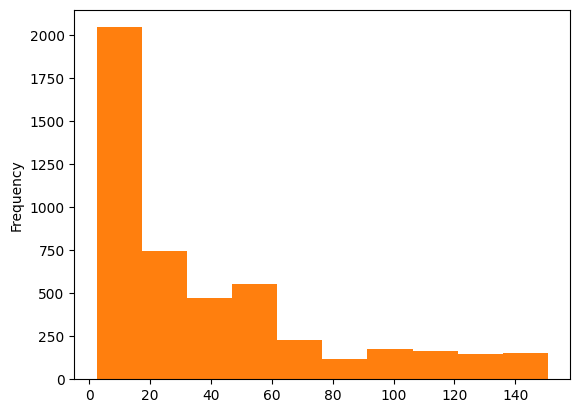

In [ ]:
data.head(50)
data['Close'].plot(kind = 'hist')
plt.hist(data['Close'])

In [ ]:

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))
look_back = 60
train_size = int(len(scaled_data) * 0.80)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - look_back:]

train_generator = TimeseriesGenerator(train_data, train_data,
                                     length=look_back, batch_size=20)
test_generator = TimeseriesGenerator(test_data, test_data,
                                     length=look_back, batch_size=1)

In [ ]:
train_generator

In [ ]:
look_back = 60
train_size = int(len(scaled_data) * 0.80)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - look_back:]

train_generator = TimeseriesGenerator(train_data, train_data,
                                     length=look_back, batch_size=20)
test_generator = TimeseriesGenerator(test_data, test_data,
                                     length=look_back, batch_size=1)

In [ ]:

rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, return_sequences=True,
                        input_shape=(look_back, 1)))
rnn_model.add(SimpleRNN(units=50))
rnn_model.add(Dense(1))

rnn_model.compile(optimizer='adam', loss='mean_squared_error')
rnn_model.fit(train_generator, epochs=5)

Epoch 1/5
163/163 [==============================] - 4s 18ms/step - loss: 0.0137
Epoch 2/5
163/163 [==============================] - 2s 14ms/step - loss: 4.9425e-04
Epoch 3/5
163/163 [==============================] - 2s 14ms/step - loss: 2.2920e-04
Epoch 4/5
163/163 [==============================] - 3s 17ms/step - loss: 2.9030e-04
Epoch 5/5
163/163 [==============================] - 2s 14ms/step - loss: 3.6748e-04


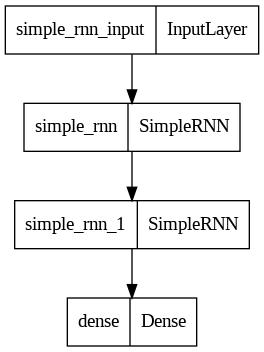

In [ ]:
plot_model(rnn_model)

In [ ]:
# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True,
                    input_shape=(look_back, 1)))
lstm_model.add(LSTM(units=100,return_sequences = True))
lstm_model.add(LSTM(units=100))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(train_generator, epochs=5)

Epoch 1/5
189/189 [==============================] - 16s 66ms/step - loss: 0.0023
Epoch 2/5
189/189 [==============================] - 13s 70ms/step - loss: 2.3454e-04
Epoch 3/5
189/189 [==============================] - 13s 66ms/step - loss: 2.9536e-04
Epoch 4/5
189/189 [==============================] - 13s 66ms/step - loss: 3.4635e-04
Epoch 5/5
189/189 [==============================] - 12s 66ms/step - loss: 2.0172e-04


In [ ]:
rnn_predictions = rnn_model.predict(test_generator)
lstm_predictions = lstm_model.predict(test_generator)

960/960 [==============================] - 15s 15ms/step


In [ ]:
rnn_predictions

array([[0.70207965],
       [0.6842663 ],
       [0.7146465 ],
       [0.71076214],
       [0.7209517 ],
       [0.70865554],
       [0.6878423 ],
       [0.6571528 ],
       [0.6586636 ],
       [0.66579896],
       [0.64326197],
       [0.6582586 ],
       [0.662363  ],
       [0.65728325],
       [0.67705804],
       [0.70864254],
       [0.6914683 ],
       [0.6891893 ],
       [0.68258625],
       [0.6577743 ],
       [0.6705939 ],
       [0.69356894],
       [0.6937892 ],
       [0.7264288 ],
       [0.7211713 ],
       [0.70629126],
       [0.70908993],
       [0.68923   ],
       [0.6904139 ],
       [0.69887704],
       [0.674964  ],
       [0.7053963 ],
       [0.6891901 ],
       [0.69617724],
       [0.6553944 ],
       [0.6612132 ],
       [0.63096493],
       [0.6917523 ],
       [0.6828252 ],
       [0.7100453 ],
       [0.6949676 ],
       [0.69804627],
       [0.7132814 ],
       [0.7238779 ],
       [0.7307131 ],
       [0.7352198 ],
       [0.72878623],
       [0.747

In [ ]:

rnn_predictions = scaler.inverse_transform(rnn_predictions)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
actual_prices = scaler.inverse_transform(test_data[look_back:])

In [ ]:
test_data

array([[0.81582181],
       [0.79327831],
       [0.7551237 ],
       [0.78495175],
       [0.82612544],
       [0.83542261],
       [0.85790983],
       [0.85460983],
       [0.89342341],
       [0.87529878],
       [0.90399269],
       [0.90613314],
       [0.91051102],
       [0.92379289],
       [0.91760662],
       [0.88700735],
       [0.89774001],
       [0.927803  ],
       [0.90144878],
       [0.86173599],
       [0.85447186],
       [0.82939474],
       [0.78634109],
       [0.77181283],
       [0.79134224],
       [0.76035471],
       [0.76758821],
       [0.79384546],
       [0.77049489],
       [0.73669773],
       [0.68230857],
       [0.71945687],
       [0.68120514],
       [0.63537771],
       [0.68023967],
       [0.634826  ],
       [0.65720588],
       [0.66714176],
       [0.7125605 ],
       [0.65301189],
       [0.64191139],
       [0.61559287],
       [0.63092322],
       [0.624553  ],
       [0.6163796 ],
       [0.65065186],
       [0.63304832],
       [0.652

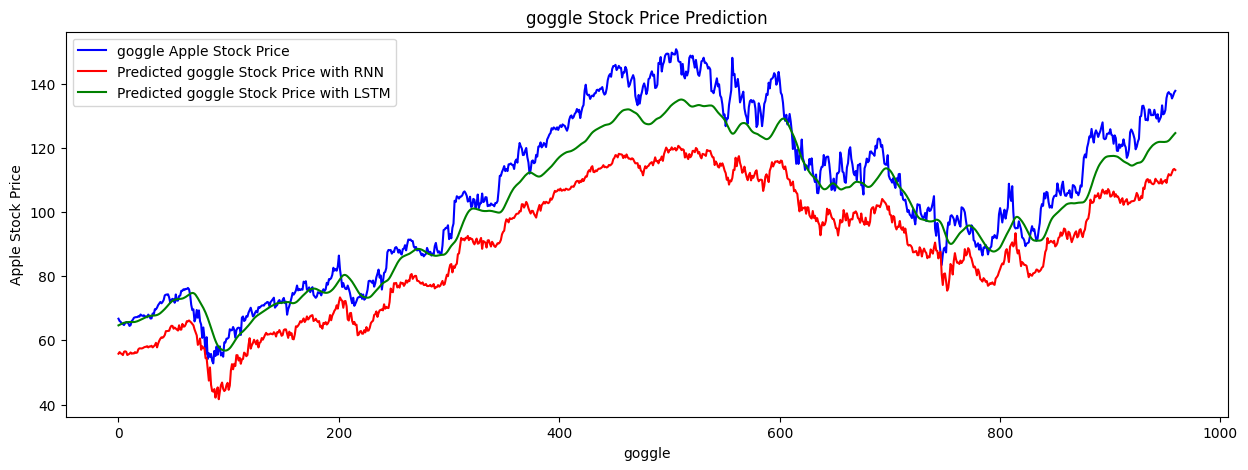

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(actual_prices, color='blue', label='goggle Apple Stock Price')
plt.plot(rnn_predictions, color='red', label='Predicted goggle Stock Price with RNN')
plt.plot(lstm_predictions, color='green', label='Predicted goggle Stock Price with LSTM')
plt.title('goggle Stock Price Prediction')
plt.xlabel('goggle')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [ ]:
def predict_future_days(model, base_data, days_to_predict, scaler, look_back=2000):
    # Start with the last days of the base data
    input_data = base_data[-look_back:].reshape(1, look_back, 1)

    # Predict future days
    future_predictions = []

    for _ in range(days_to_predict):
        # Make a prediction
        prediction = model.predict(input_data)

        # Append the prediction
        future_predictions.append(prediction[0, 0])

        # Update the input data to include the prediction and exclude the oldest data point
        # Correctly reshape the prediction to (1, 1, 1) before appending
        input_data = np.append(input_data[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

    # Invert the scaling
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

    return future_predictions



In [ ]:
# Predict next 50 days
days_to_predict = 365
future_days = predict_future_days(lstm_model, scaled_data, days_to_predict, scaler, look_back)

1/1 [==============================] - 0s 29ms/step


<ipython-input-46-cb07f5c2f778>:2: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  predicted_dates = pd.date_range(start=data.index[-1], periods=days_to_predict + 1, closed='right')


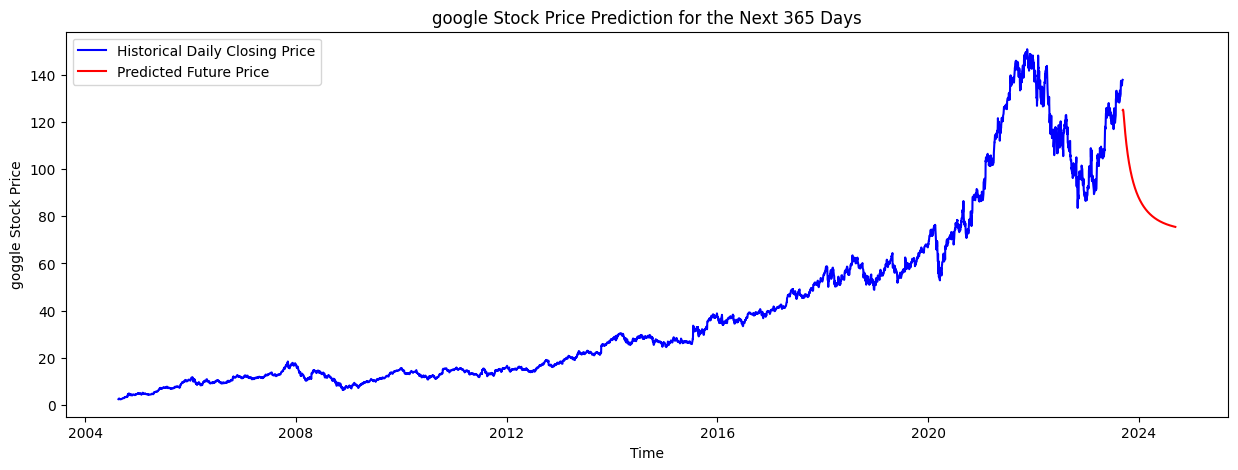

In [ ]:
 # Plot the predictions
predicted_dates = pd.date_range(start=data.index[-1], periods=days_to_predict + 1, closed='right')
plt.figure(figsize=(15,5))
plt.plot(data.index, data['Close'], color='blue', label='Historical Daily Closing Price')
plt.plot(predicted_dates, future_days, color='red', label='Predicted Future Price')
plt.title(f'google Stock Price Prediction for the Next {days_to_predict} Days')
plt.xlabel('Time')
plt.ylabel('goggle Stock Price')
plt.legend()
plt.show()


In [ ]:
days_to_predict = 50
future_days = predict_future_days(rnn_model, scaled_data, days_to_predict, scaler, look_back)

1/1 [==============================] - 0s 17ms/step


<ipython-input-52-d0773611d445>:1: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  predicted_dates = pd.date_range(start=data.index[-1], periods=days_to_predict + 1, closed='right')


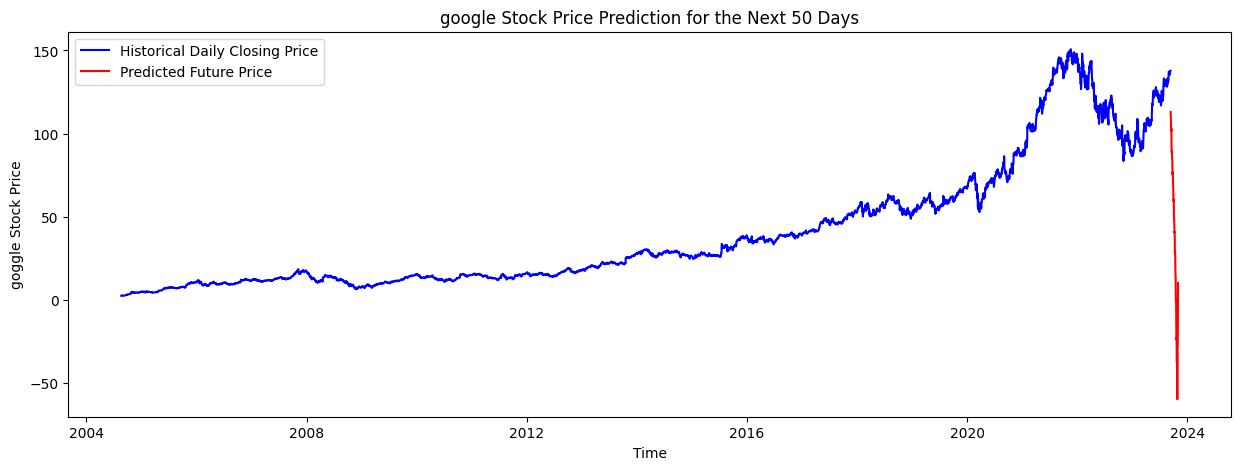

In [ ]:
predicted_dates = pd.date_range(start=data.index[-1], periods=days_to_predict + 1, closed='right')
plt.figure(figsize=(15,5))
plt.plot(data.index, data['Close'], color='blue', label='Historical Daily Closing Price')
plt.plot(predicted_dates, future_days, color='red', label='Predicted Future Price')
plt.title(f'google Stock Price Prediction for the Next {days_to_predict} Days')
plt.xlabel('Time')
plt.ylabel('goggle Stock Price')
plt.legend()
plt.show()